# 사이킷런으로 수행하는 타이타닉 생존자 예측 실습

In [63]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold, cross_val_score , cross_validate,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder,StandardScaler, MinMaxScaler
import graphviz

import missingno as msno

sklearn.__version__

numpy version: 1.20.1
pandas version: 1.2.4


'0.24.1'

## [실습] 타이타닉 생존자 ML예측 구현
- 데이터 전처리(null 처리, 불필요한 속성 제거, 인코딩 수행)
- 모델학습 및 검증/ 예측/ 평가

In [3]:
# 1. 데이터 불러오기
titanic_frm = pd.read_csv('C:/Users/whgud/data/titanic_train.csv')
titanic_frm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_frm.info() # 생존율을 예측분류 할거라, survived가 target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2. 결측값 처리
- missingno를 이용한 결측값 확인 및 처리
- Age의 결측값은 평균으로 처리
- Cabin, Embarked의 결측값 → "N"으로 대체

<AxesSubplot:>

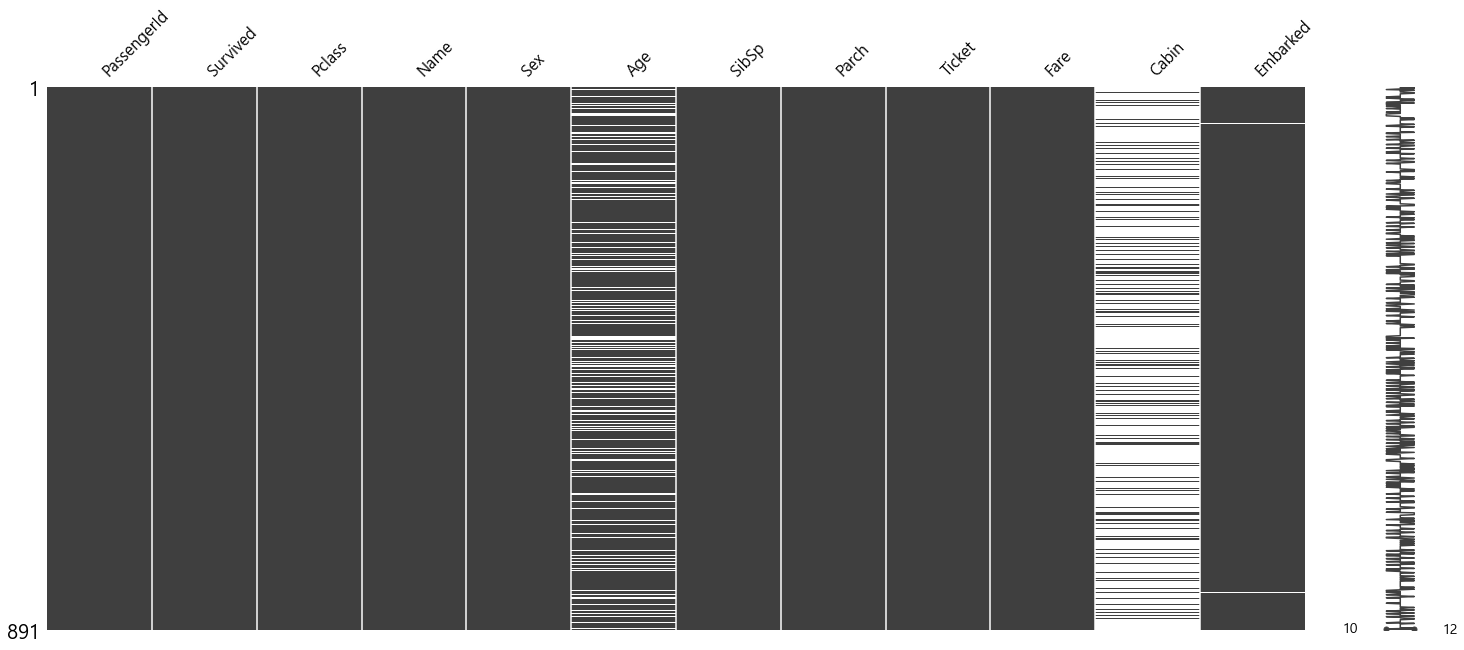

In [8]:
msno.matrix(titanic_frm)

In [11]:
titanic_age_imputer = SimpleImputer(strategy = 'mean')
titanic_frm['Age'] = titanic_age_imputer.fit_transform(titanic_frm[['Age']])

<AxesSubplot:>

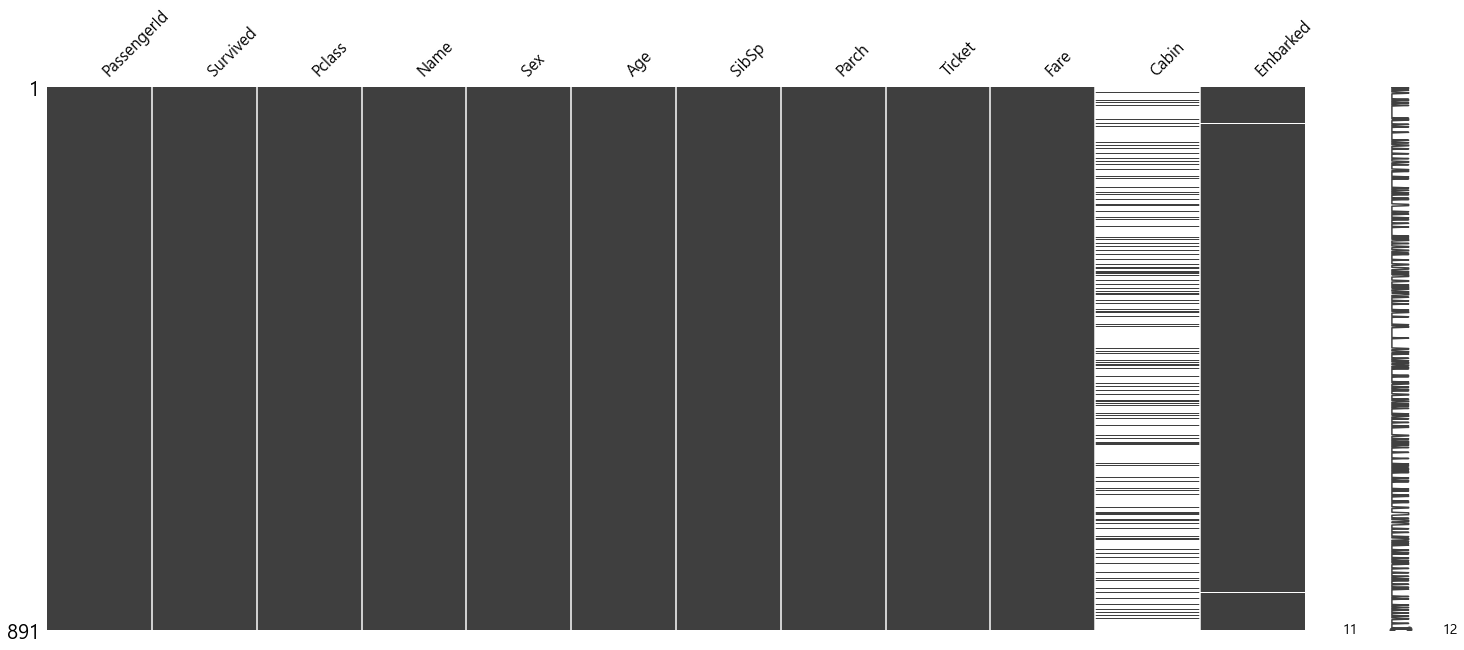

In [12]:
msno.matrix(titanic_frm)

<AxesSubplot:>

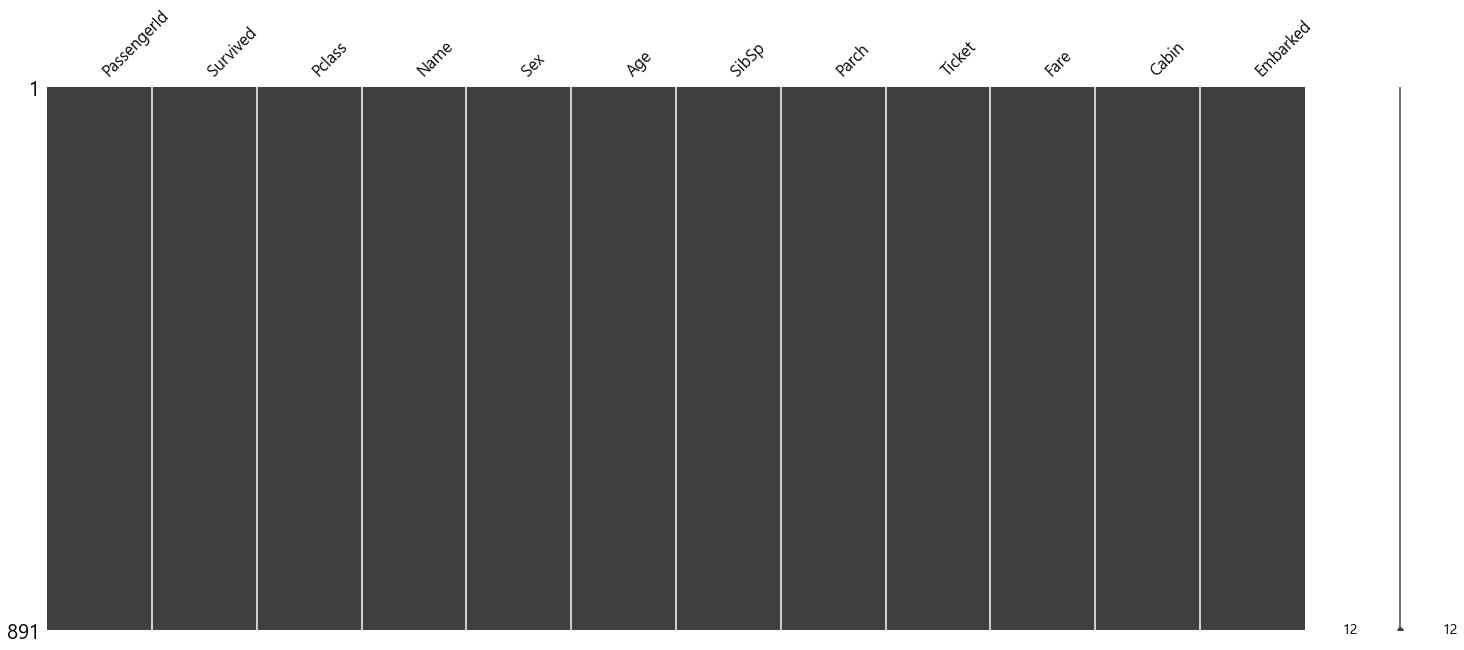

In [15]:
titanic_frm['Cabin'] = titanic_frm['Cabin'].fillna('N')
titanic_frm['Embarked'] = titanic_frm['Embarked'].fillna('N')
msno.matrix(titanic_frm)

### 3.성별에 따른 생존 여부 확인하기 위한 barplot 시각화 (seaborn)

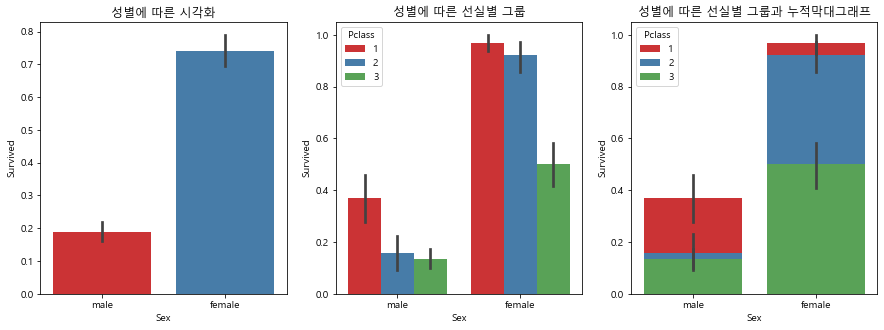

In [23]:
# 성별에 따른 시각화, 선실별로 그룹, 누적막대그래프로
fig = plt.figure(figsize= (15,5))
ax01 = fig.add_subplot(1,3,1)
ax02 = fig.add_subplot(1,3,2)
ax03 = fig.add_subplot(1,3,3)

ax01.set_title('성별에 따른 시각화')
sns.barplot(x='Sex',y='Survived', data = titanic_frm, ax=ax01, palette = 'Set1')

ax02.set_title('성별에 따른 선실별 그룹')
sns.barplot(x='Sex',y='Survived', data = titanic_frm, hue='Pclass', ax=ax02, palette = 'Set1')


ax03.set_title('성별에 따른 선실별 그룹과 누적막대그래프')
sns.barplot(x='Sex',y='Survived', data = titanic_frm, hue='Pclass',dodge =False, ax=ax03, palette = 'Set1')



plt.show()
plt.close()

In [26]:
# 성별에 따른 생존자 수를 비교 - groupby
titanic_frm.groupby(['Sex','Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [37]:
# 나이에 따른 생존확률
pd.DataFrame(titanic_frm['Age'].value_counts()).T

,29.699118,24.000000,22.000000,18.000000,30.000000,28.000000,19.000000,21.000000,25.000000,36.000000,...,34.500000,23.500000,80.000000,0.670000,36.500000,53.000000,55.500000,0.920000,24.500000,70.500000
Age,177,30,27,26,25,25,25,24,23,22,...,1,1,1,1,1,1,1,1,1,1


In [42]:
# 나이에 따른 연령층을 분류해보기
def age_category(s):
    cat = ''
    if 0 <= s <= 9:
        cat = '10대 이하'
    elif 10 <= s <= 19:
        cat = '10대'
    elif 20 <= s <= 29:
        cat = '20대'
    elif 30 <= s <= 39:
        cat = '30대'
    elif 40 <= s <= 49:
        cat = '40대'
    elif 50 <= s <= 59:
        cat = '50대'
    elif 60 <= s <= 69:
        cat = '60대'
    elif 70 <= s <= 79:
        cat = '70대'
    else:
        cat = '80대 이상'
    return cat
titanic_frm['AgeCat']=titanic_frm['Age'].apply(lambda x : age_category(x))

In [43]:
titanic_frm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,20대
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,30대
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,20대
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,30대
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,20대
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,10대
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,80대 이상
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,20대


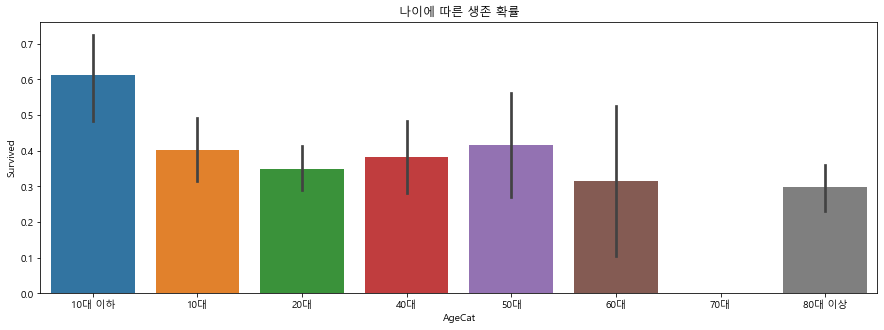

In [50]:
fig = plt.figure(figsize = (15,5))

sns.barplot(x='AgeCat',y='Survived',data = titanic_frm,
           order = ['10대 이하','10대','20대','40대','50대','60대','70대','80대 이상'],
           ).set(title = '나이에 따른 생존 확률')

plt.show()
plt.close()

In [ ]:
# feature importance : 트리 분류 모델 형성에 각 특성이 얼마나 잘 작용했는지를 평가하는 지표
# 해당 지표는 0~1사이의 값을 가지며, 0이면 특성이 전혀 작용하지 않았음을 의미하고, 1은 완전하게 작용하였음을 의미
# 특성 중요도 전체의 합은 1이다.
for name, value in zip(iris.feature_names , estimator.feature_importances_) :
    print(name, value)

sns.barplot(x = estimator.feature_importances_ , y = iris.feature_names)


In [53]:
titanic_frm.drop('AgeCat',axis=1,inplace=True)
titanic_frm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [54]:
titanic_subset_frm = titanic_frm[['Survived','Pclass','Sex','Age','SibSp','Parch','Cabin','Embarked']]
titanic_subset_frm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,N,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,N,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,N,S


### 4. 전처리 - 레이블 인코딩(Sex, Cabin, Embarked)

In [57]:
# Sex 레이블 인코딩 

encoder = LabelEncoder() #  male -> 1 , female -> 0
sex_labels=encoder.fit_transform(titanic_subset_frm['Sex'])
titanic_subset_frm['Sex']=sex_labels
titanic_subset_frm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,N,S
1,1,1,0,38.0,1,0,C85,C
2,1,3,0,26.0,0,0,N,S
3,1,1,0,35.0,1,0,C123,S
4,0,3,1,35.0,0,0,N,S


In [58]:
# Cabin 레이블 인코딩 -> 첫번째 알파벳만 추출해서 레이블 인코딩

encoder = LabelEncoder() 
cabin_labels=encoder.fit_transform(titanic_subset_frm['Cabin'].str[:1])
titanic_subset_frm['Cabin']=cabin_labels
titanic_subset_frm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,7,S
1,1,1,0,38.0,1,0,2,C
2,1,3,0,26.0,0,0,7,S
3,1,1,0,35.0,1,0,2,S
4,0,3,1,35.0,0,0,7,S


In [59]:
# Cabin 레이블 인코딩 

encoder = LabelEncoder() 
embarked_labels=encoder.fit_transform(titanic_subset_frm['Embarked'])
titanic_subset_frm['Embarked']=embarked_labels
titanic_subset_frm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,7,3
1,1,1,0,38.0,1,0,2,0
2,1,3,0,26.0,0,0,7,3
3,1,1,0,35.0,1,0,2,3
4,0,3,1,35.0,0,0,7,3


## 학습을 위한 준비
- step01 : feature, label 데이터셋 추출
- step02 : 데이터 분리
- step03 : 분류모델 선정 후 학습
- step04 : 예측
- step05 : 평가

- additional 교차검증 추가(KFold, cross_val_score, GridSearchCV)
- 피처 중요도 확인

In [74]:
titanic_features = titanic_subset_frm.iloc[:,1:]
# 다른방법 : titanic_subset_frm.iloc[:,~titanic_subset_frm.columns.isin['Survived']]
titanic_label=titanic_subset_frm.iloc[:,[0]]

X_train, X_test, y_train, y_test = train_test_split(titanic_features,
                                                    titanic_label,
                                                    test_size=0.2,
                                                    random_state = 100)

In [75]:
# 모델 생성
dt_model = DecisionTreeClassifier(random_state = 200)
rf_model = RandomForestClassifier(random_state = 200)
lr_model = LogisticRegression(random_state = 200)

In [79]:
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print('dt model accuracy : ', accuracy_score(y_test, dt_pred))

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print('rf model accuracy : ', accuracy_score(y_test, rf_pred))

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print('lr model accuracy : ', accuracy_score(y_test, lr_pred))

dt model accuracy :  0.776536312849162
rf model accuracy :  0.8268156424581006
lr model accuracy :  0.8044692737430168


In [88]:
# 교차검증을 위한 함수 생성
def def_kfold(clf, folds):
    cv_accuracy=[]
    kfold = KFold(n_splits=folds)

    n_iter=0
    for train_idx, test_idx in kfold.split(titanic_features):
    #     print('train_idx : ',train_idx)
    #     print('test_idx : ',test_idx)
            X_train, X_val = titanic_features.values[train_idx], titanic_features.values[test_idx]
            y_train, y_val = titanic_label.values[train_idx], titanic_label.values[test_idx]

            # 학습과 예측
            clf.fit(X_train,y_train)
            clf_pred = clf.predict(X_val)

            n_iter += 1

            #학습 데이터에 대한 검증 정확도 측정
            acc = accuracy_score(y_val, clf_pred)
            print('{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증데이터 크기 : {}'.format(n_iter, acc, X_train.shape[0],X_val.shape[0]))

            cv_accuracy.append(acc)
    print('교차검증 평균 정확도 : ', np.mean(cv_accuracy))

In [89]:
# KFold 교차검증 (DecisionTreeClassifier)
def_kfold(dt_model, 5)

1 교차검증 정확도 : 0.7653631284916201, 학습 데이터 크기 : 712, 검증데이터 크기 : 179
2 교차검증 정확도 : 0.797752808988764, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
3 교차검증 정확도 : 0.797752808988764, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
4 교차검증 정확도 : 0.7808988764044944, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
5 교차검증 정확도 : 0.8370786516853933, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
교차검증 평균 정확도 :  0.7957692549118072


In [90]:
# KFold 교차검증 (RandomForestClassifier)
def_kfold(rf_model, 5)

1 교차검증 정확도 : 0.7039106145251397, 학습 데이터 크기 : 712, 검증데이터 크기 : 179
2 교차검증 정확도 : 0.8089887640449438, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
3 교차검증 정확도 : 0.8202247191011236, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
4 교차검증 정확도 : 0.7752808988764045, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
5 교차검증 정확도 : 0.8258426966292135, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
교차검증 평균 정확도 :  0.786849538635365


In [92]:
# KFold 교차검증 (LogisticRegression)
def_kfold(lr_model, 5)

1 교차검증 정확도 : 0.7988826815642458, 학습 데이터 크기 : 712, 검증데이터 크기 : 179
2 교차검증 정확도 : 0.7808988764044944, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
3 교차검증 정확도 : 0.7752808988764045, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
4 교차검증 정확도 : 0.7528089887640449, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
5 교차검증 정확도 : 0.8202247191011236, 학습 데이터 크기 : 713, 검증데이터 크기 : 178
교차검증 평균 정확도 :  0.7856192329420626


In [97]:
# cross_val_score()를 활용한 교차검증
print('DecisionTreeClassifier모델 교차검증')
print('성능평가지표:accuracy, 교차검증 5회 수행시')
scores_d = cross_val_score(dt_model,titanic_features,titanic_label,scoring='accuracy',cv=5)
print(scores_d)
print(' 평균 검증 정확도 : ',np.round(np.mean(scores),3))
print()

print('RandomForestClassifier모델 교차검증')
print('성능평가지표:accuracy, 교차검증 5회 수행시')
scores_r = cross_val_score(rf_model,titanic_features,titanic_label,scoring='accuracy',cv=5)
print(scores_r)
print(' 평균 검증 정확도 : ',np.round(np.mean(scores),3))
print()

print('LogisticRegression모델 교차검증')
print('성능평가지표:accuracy, 교차검증 5회 수행시')
scores_l = cross_val_score(lr_model,titanic_features,titanic_label,scoring='accuracy',cv=5)
print(scores_l)
print(' 평균 검증 정확도 : ',np.round(np.mean(scores),3))
print()

DecisionTreeClassifier모델 교차검증
성능평가지표:accuracy, 교차검증 5회 수행시
[0.74860335 0.78089888 0.82022472 0.79775281 0.83707865]
 평균 검증 정확도 :  0.797

RandomForestClassifier모델 교차검증
성능평가지표:accuracy, 교차검증 5회 수행시
[0.73743017 0.79775281 0.8258427  0.78089888 0.83146067]
 평균 검증 정확도 :  0.797

LogisticRegression모델 교차검증
성능평가지표:accuracy, 교차검증 5회 수행시
[0.80446927 0.78089888 0.78089888 0.76966292 0.80898876]
 평균 검증 정확도 :  0.797



In [192]:
# GridSearchCV를 활용해 최적 하이퍼 파라미터를 찾고 예측성능 측정해보기1
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}
grid_dclf =  GridSearchCV(dt_model, # 교차검증과 튜닝이 된 객체가 만들어짐.
                            param_grid=parameters ,
                            cv=5,
                            scoring ='accuracy'
                             )

grid_dclf.fit(X_train, y_train)

print('최적의 파라미터 확인')
print()
print(grid_dclf.best_params_)
print('높은 정확도 확인')
print()
print(grid_dclf.best_score_)


estimator=grid_gscv_tree.best_estimator_
y_predict = estimator.predict(X_test)
print('answer : \n',y_test['Survived'].values)
print()
print('guess : \n',y_predict)
print()
print('테스트 정확도 : ', accuracy_score(y_test, y_predict))


최적의 파라미터 확인

{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
높은 정확도 확인

0.8187629272136314
answer : 
 [0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1
 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0]

guess : 
 [0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1]

테스트 정확도 :  0.8100558659217877


In [193]:
# GridSearchCV를 활용해 최적 하이퍼 파라미터를 찾고 예측성능 측정해보기2


param={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,5,8]
}

grid_gscv_tree= GridSearchCV(dt_model, # 교차검증과 튜닝이 된 객체가 만들어짐.
                             param_grid=param,
                             cv=5,
                             refit=True,
                             scoring ='accuracy'
                             )


In [194]:
grid_gscv_tree.fit(X_train,y_train)
grid_gscv_tree.cv_results_

{'mean_fit_time': array([0.0035913 , 0.00259142, 0.00219307, 0.00339003, 0.00279117,
        0.00219531, 0.00179315, 0.00279002, 0.00239935, 0.00159507,
        0.00139699, 0.00199418, 0.00139608, 0.00119619, 0.00219593,
        0.00139613, 0.00099716, 0.00219197, 0.00169888, 0.001226  ,
        0.00119624, 0.00199389, 0.00139613, 0.00318213, 0.00278649,
        0.00179529, 0.00418882, 0.00219536, 0.00259037, 0.00119624,
        0.00119758, 0.00279608, 0.00179682, 0.0016263 , 0.00139585,
        0.00119867, 0.00139742, 0.00139546, 0.00299282, 0.00199723,
        0.00319114, 0.00199118, 0.00199552, 0.00199394, 0.00178652,
        0.00159607, 0.00199413, 0.00219412, 0.00159812, 0.0014504 ,
        0.00179482, 0.00179343, 0.00159712, 0.00259304, 0.00219307,
        0.00239367, 0.00299025, 0.00319185, 0.0029932 , 0.00279565,
        0.00259295, 0.00199528, 0.00239401, 0.00219479, 0.00299349,
        0.0013968 , 0.00179543, 0.00159655, 0.00259242, 0.00199199,
        0.00159454, 0.00119786,

In [195]:
print('최적의 파라미터 확인')
print()
print(grid_gscv_tree.best_params_)
print('높은 정확도 확인')
print()
print(grid_gscv_tree.best_score_)

최적의 파라미터 확인

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}
높은 정확도 확인

0.8187629272136314


In [196]:
estimator=grid_gscv_tree.best_estimator_
y_predict = estimator.predict(X_test)
print('answer : \n',y_test['Survived'].values)
print()
print('guess : \n',y_predict)
print()
print('테스트 정확도 : ', accuracy_score(y_test, y_predict))

answer : 
 [0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1
 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0]

guess : 
 [0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1]

테스트 정확도 :  0.8100558659217877


Pclass 0.17646048920143095
Sex 0.6036313479962322
Age 0.0871983797290286
SibSp 0.0
Parch 0.0
Cabin 0.09773472774385657
Embarked 0.034975055329451735


<AxesSubplot:>

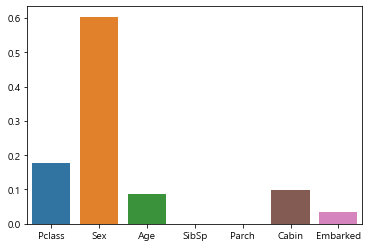

In [197]:
# 피처의 중요도를 시각화
# feature importance : 트리 분류 모델 형성에 각 특성이 얼마나 잘 작용했는지를 평가하는 지표
# 해당 지표는 0~1사이의 값을 가지며, 0이면 특성이 전혀 작용하지 않았음을 의미하고, 1은 완전하게 작용하였음을 의미
# 특성 중요도 전체의 합은 1이다.
for name, value in zip(titanic_features, estimator.feature_importances_) :
    print(name, value)

sns.barplot(y = estimator.feature_importances_ , x = titanic_features.columns)


### 주의! 이진분류의 경우, 정확도만 평가지표로 삼기엔 부족하다. 다른 평가지표까지 함께 적용해야 더 정확한 결과를 얻을 수 있다.